## Comprime audios para el estudio de análisis de sentimientos

In [5]:
import os
import librosa
import soundfile as sf
import numpy as np

# ========== CONFIGURACIÓN ==========
DATASET_PATH = "Dataset_T" # Dataset de audios que contiene las carpetas: Alegria, Enojo, Miedo, Neutral, Sorpresa y Tristeza 
OUTPUT_PATH = "Dataset_comprimido"
SAMPLE_RATE = 16000
THRESHOLD_DB = -25    # Nivel donde empieza a comprimirse
RATIO = 3.0           # Ratio de compresión
MAKEUP_GAIN = 5.0     # Ganancia final para compensar

# ========== FUNCIONES ==========
def db_to_amp(db):
    return 10 ** (db / 20.0)

def compress_dynamic(y, sr, threshold_db, ratio, makeup_gain_db):
    frame_length = 2048
    hop_length = 512
    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    rms_db = librosa.amplitude_to_db(rms, ref=1.0)

    gain_db = np.zeros_like(rms_db)
    for i, db_val in enumerate(rms_db):
        if db_val > threshold_db:
            gain_db[i] = (threshold_db + (db_val - threshold_db) / ratio) - db_val
        else:
            gain_db[i] = 0.0

    gain_db += makeup_gain_db
    gain = db_to_amp(gain_db)

    y_compressed = np.zeros_like(y)
    for i, g in enumerate(gain):
        start = i * hop_length
        end = min(start + frame_length, len(y))
        y_compressed[start:end] += y[start:end] * g

    # Evitar clipping
    max_amp = np.max(np.abs(y_compressed))
    if max_amp > 1.0:
        y_compressed = y_compressed / max_amp

    return y_compressed

# ========== PROCESAR ==========
os.makedirs(OUTPUT_PATH, exist_ok=True)

for emotion_folder in os.listdir(DATASET_PATH):
    input_emotion_path = os.path.join(DATASET_PATH, emotion_folder)
    output_emotion_path = os.path.join(OUTPUT_PATH, emotion_folder)
    os.makedirs(output_emotion_path, exist_ok=True)

    if not os.path.isdir(input_emotion_path):
        continue

    for fname in os.listdir(input_emotion_path):
        if fname.lower().endswith(".wav"):
            path = os.path.join(input_emotion_path, fname)
            y, sr = librosa.load(path, sr=SAMPLE_RATE)
            y_comp = compress_dynamic(y, sr, THRESHOLD_DB, RATIO, MAKEUP_GAIN)
            output_path = os.path.join(output_emotion_path, fname)
            sf.write(output_path, y_comp, sr)

print("Compresión dinámica aplicada a todos los audios.")


C:\Users\curso\AppData\Local\Temp\ipykernel_8232\2179580916.py:61: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=SAMPLE_RATE)
C:\Users\curso\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Compresión dinámica aplicada a todos los audios.


## Analiza audios y genera el modelo de emociones 

  - Estadísticas para Alegria:
  - Archivos originales: 779
  - Archivos válidos (duración correcta): 246
Porcentaje válidos: 31.6%
  - Necesarios 4 archivos adicionales por data augmentation
  - Estadísticas para Enojo:
  - Archivos originales: 772
  - Archivos válidos (duración correcta): 406
Porcentaje válidos: 52.6%
No se necesitó data augmentation
  - Estadísticas para Miedo:
  - Archivos originales: 766
  - Archivos válidos (duración correcta): 367
Porcentaje válidos: 47.9%
No se necesitó data augmentation
  - Estadísticas para Neutral:
  - Archivos originales: 778
  - Archivos válidos (duración correcta): 332
Porcentaje válidos: 42.7%
No se necesitó data augmentation
  - Estadísticas para Sorpresa:
  - Archivos originales: 772
  - Archivos válidos (duración correcta): 396
Porcentaje válidos: 51.3%
No se necesitó data augmentation
  - Estadísticas para Tristeza:
  - Archivos originales: 781
  - Archivos válidos (duración correcta): 234
Porcentaje válidos: 30.0%
  - Necesarios 16 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 13, 137, 32)         │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 13, 137, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 7, 69, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 7, 69, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 7, 69, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 7, 69, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 35, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 4, 35, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 35, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 4, 35, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 18, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 2, 18, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,590 (4.87 MB)

 Trainable params: 1,275,142 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.1887 - loss: 3.6567 - val_accuracy: 0.1700 - val_loss: 1.7790
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.2426 - loss: 1.8738 - val_accuracy: 0.1667 - val_loss: 2.2264
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.2667 - loss: 1.8336 - val_accuracy: 0.1667 - val_loss: 2.9498
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2871 - loss: 1.7624 - val_accuracy: 0.1667 - val_loss: 3.1972
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.2962 - loss: 1.7490 - val_accuracy: 0.1633 - val_loss: 3.2059
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.3265 - loss: 1.6934 - val_accuracy: 0.1667 - val_loss: 2.9144
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.3618 - loss: 1.6249 - val_accuracy: 0.1700 - val_loss: 2.7808
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3604 - loss: 1.6448 - val_accuracy: 0.1967 - v

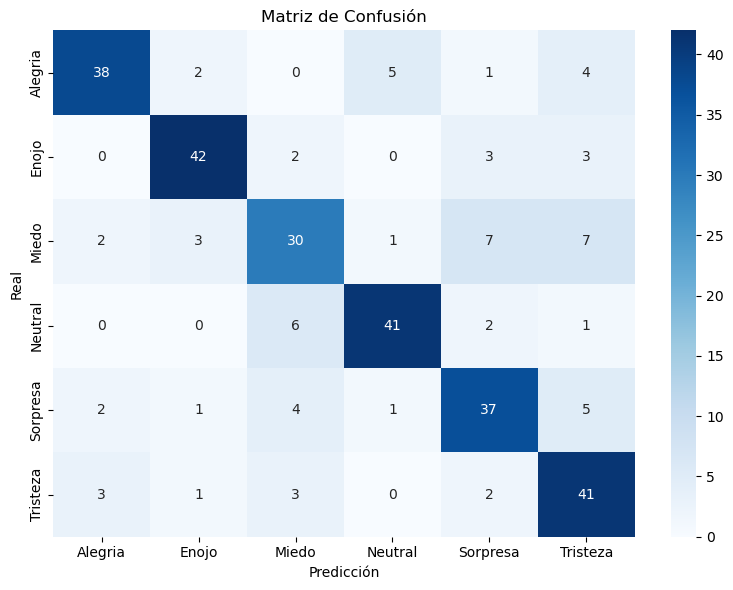

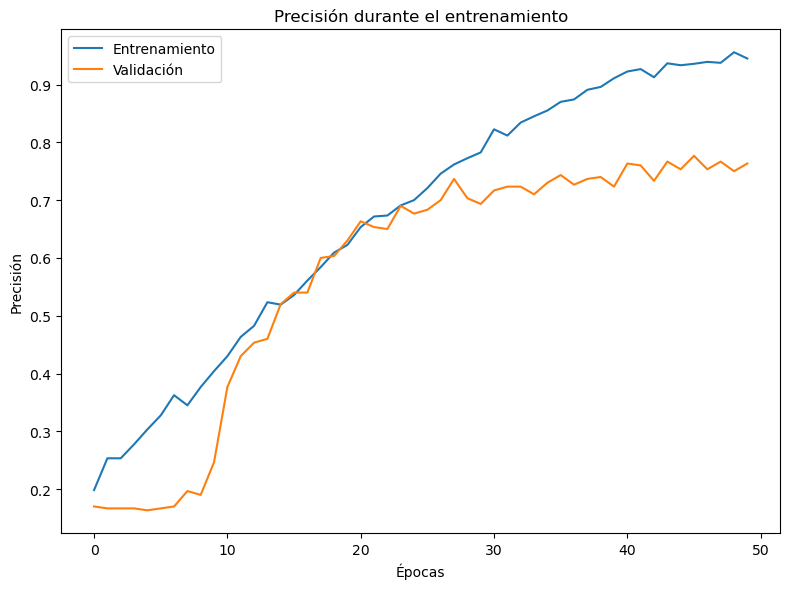

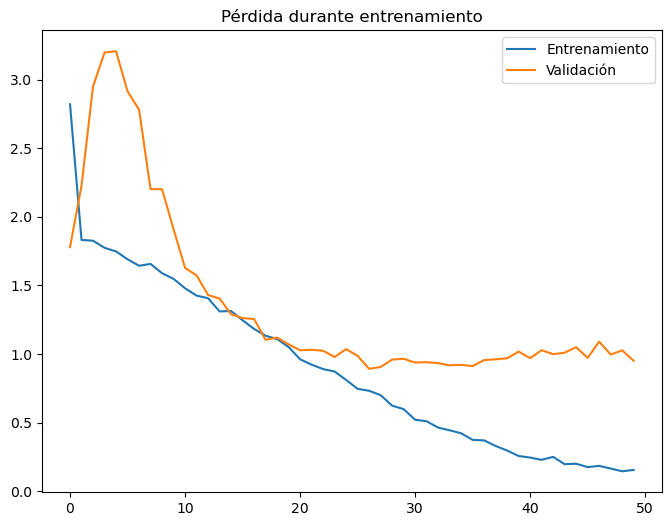

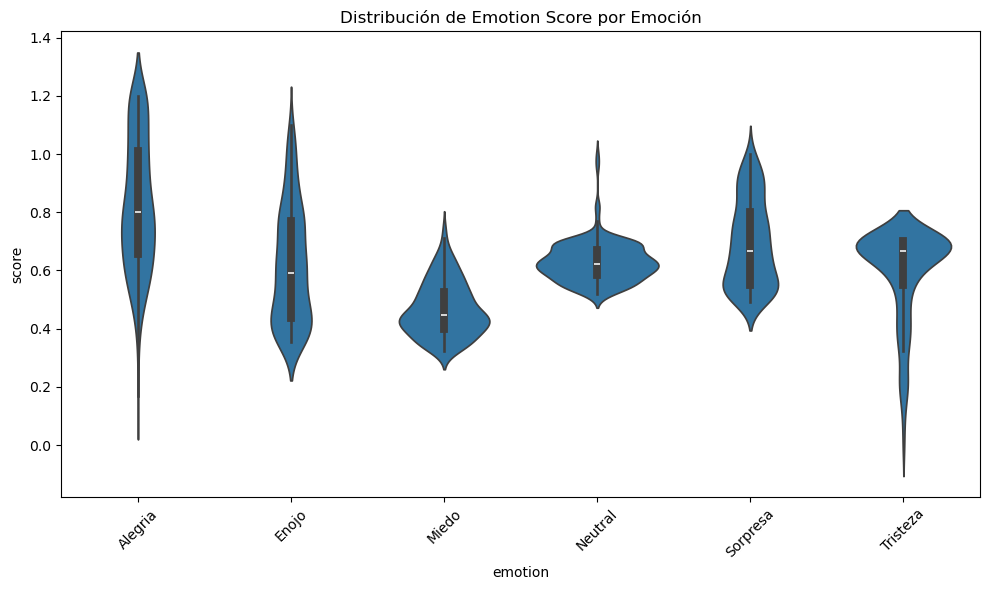

['label_encoder.pkl']

In [41]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from skimage.transform import resize
import joblib
from collections import defaultdict
import soundfile as sf
import random

# =================== CONFIG ===================
DATASET_PATH = "Dataset_comprimido"
TARGET_SIZE = (13, 100)  # (n_mfcc, frames) - tamaño fijo para los MFCCs
SAMPLE_RATE = 16000
DURATION = 2.2          # Duración fija en segundos
DURATION_MIN = 1.8
DURATION_MAX = 2.6
N_MFCC = 13             # Número de coeficientes MFCC
HOP_LENGTH = 256        # Para calcular fixed_frames
FIXED_FRAMES = int((SAMPLE_RATE * DURATION) / HOP_LENGTH)  # ~138 frames para 2.2s
EMOTIONS = ['Alegria', 'Enojo', 'Miedo', 'Neutral', 'Sorpresa','Tristeza']
MAX_FILES_PER_CLASS = 250
OUTPUT_FILE = "audios_seleccionados.csv"
OUTPUT_AUDIO_DIR = "Dataset_normalizado"

# =================== PARÁMETROS POR EMOCIÓN (PERÚ) ===================
EMOTION_PARAMS_PERU = {
    'Alegria': {
        'target_pitch': (220, 300),
        'target_energy': (-18, -8),
        'target_spec_centroid': (1500, 2500),
        'target_zcr': (0.08, 0.15),
        'weight': 1.2
    },
    'Enojo': {
        'target_pitch': (250, 350),
        'target_energy': (-15, -5),
        'target_spec_centroid': (2200, 3200),
        'target_zcr': (0.15, 0.25),
        'weight': 1.1
    },
    'Miedo': {
        'target_pitch': (170, 260),
        'target_energy': (-23, -13),
        'target_spec_centroid': (2900, 3900),
        'target_zcr': (0.11, 0.19),
        'weight': 1.0
    },
    'Tristeza': {
        'target_pitch': (90, 140),
        'target_energy': (-28, -23),
        'target_spec_centroid': (700, 1400),
        'target_zcr': (0.04, 0.09),
        'weight': 1.0
    },
    'Sorpresa': {
        'target_pitch': (210, 330),
        'target_energy': (-20, -10),
        'target_spec_centroid': (1900, 2900),
        'target_zcr': (0.09, 0.17),
        'weight': 1.0
    },
    'Neutral': {
        'target_pitch': (140, 190),
        'target_energy': (-23, -16),
        'target_spec_centroid': (900, 1400),
        'target_zcr': (0.06, 0.10),
        'weight': 1.0
    }
}

# Ajustar parámetros para las emociones que estamos usando
EMOTION_PARAMS = {k: v for k, v in EMOTION_PARAMS_PERU.items() if k in EMOTIONS}

# =================== FUNCIONES ===================

def normalize_volume(y, target_peak=0.9, threshold=0.01, max_gain=20.0):
    """
    Normalización mejorada con protección contra aumento excesivo
    
    Args:
        y: Señal de audio
        target_peak: Pico objetivo (0.9 = -0.915 dBFS)
        threshold: Umbral para aplicar aumento (default 0.01 = -40 dBFS)
        max_gain: Ganancia máxima permitida en dB (evita amplificar ruido)
    """
    peak = np.max(np.abs(y))
    
    if peak < 1e-6:  # Evitar división por cero
        return y
    
    # Calcular ganancia necesaria en dB
    needed_gain_db = 20 * np.log10(target_peak / peak)
    
    # Limitar la ganancia máxima
    applied_gain_db = min(needed_gain_db, max_gain)
    
    # Aplicar ganancia
    gain_linear = 10 ** (applied_gain_db / 20)
    y_normalized = y * gain_linear
    
    # Normalización RMS adicional para volumen consistente
    # rms = np.sqrt(np.mean(y**2))
    # y_normalized = y_normalized * (target_rms/rms) if rms > 0 else y_normalized
    
    return y_normalized

def extract_mfcc_features(y, sr=SAMPLE_RATE, n_mfcc=N_MFCC, fixed_frames=FIXED_FRAMES):
    """Extrae características MFCC con tamaño estandarizado"""
    try:
        # Asegurar duración consistente
        y = librosa.util.fix_length(y, size=int(DURATION * sr))
        
        # Extraer MFCCs con parámetros fijos
        mfccs = librosa.feature.mfcc(
            y=y, 
            sr=sr, 
            n_mfcc=n_mfcc,
            n_fft=512,
            hop_length=HOP_LENGTH
        )
        
        # Extraer deltas
        delta = librosa.feature.delta(mfccs)
        delta2 = librosa.feature.delta(mfccs, order=2)
        
        # Ajustar tamaño temporal
        def resize_mfcc(mfcc, target_frames):
            if mfcc.shape[1] < target_frames:
                return np.pad(mfcc, ((0,0), (0, target_frames - mfcc.shape[1])))
            else:
                return mfcc[:, :target_frames]
        
        mfccs = resize_mfcc(mfccs, fixed_frames)
        delta = resize_mfcc(delta, fixed_frames)
        delta2 = resize_mfcc(delta2, fixed_frames)
        
        # Apilar canales (MFCC, delta, delta-delta)
        stacked = np.stack([mfccs, delta, delta2], axis=-1)
        
        # Normalización por instancia
        stacked = (stacked - np.mean(stacked)) / (np.std(stacked) + 1e-6)
        
        return stacked
    except Exception as e:
        print(f"Error procesando MFCC: {e}")
        return None

def augment_audio(y, sr=SAMPLE_RATE, target_duration=DURATION):
    """
    Función mejorada de aumento de datos que:
    1. Selecciona los mejores segmentos del audio basado en energía
    2. Completa la duración requerida con repeticiones inteligentes
    3. Aplica transformaciones de aumento más naturales
    """
    # 1. Encontrar los segmentos más energéticos (mejores partes)
    intervals = librosa.effects.split(y, top_db=20)
    if len(intervals) == 0:
        intervals = np.array([[0, len(y)]])
    
    # Calcular energía de cada segmento
    energies = []
    for start, end in intervals:
        segment = y[start:end]
        energies.append(np.mean(librosa.feature.rms(y=segment)))
    
    # Ordenar segmentos por energía (de mayor a menor)
    sorted_segments = [seg for _, seg in sorted(zip(energies, intervals), reverse=True)]
    
    # 2. Construir nuevo audio con los mejores segmentos
    new_audio = np.array([], dtype=y.dtype)
    remaining_samples = int(target_duration * sr) - len(y)
    
    # Completar con repeticiones inteligentes de los mejores segmentos
    while remaining_samples > 0 and len(sorted_segments) > 0:
        best_start, best_end = sorted_segments[0]
        best_segment = y[best_start:best_end]
        
        # Tomar una porción del mejor segmento (no más de lo necesario)
        take_samples = min(len(best_segment), remaining_samples)
        new_audio = np.concatenate([new_audio, best_segment[:take_samples]])
        remaining_samples -= take_samples
        
        # Rotar segmentos para variedad
        sorted_segments.append(sorted_segments.pop(0))
    
    # Si aún queda espacio, aplicar stretching temporal suave
    if remaining_samples > 0:
        stretch_factor = len(y) / (len(y) + remaining_samples)
        y_stretched = librosa.effects.time_stretch(y, rate=stretch_factor)
        new_audio = librosa.util.fix_length(y_stretched, size=int(target_duration * sr))
    else:
        new_audio = librosa.util.fix_length(np.concatenate([y, new_audio]), 
                                         size=int(target_duration * sr))
    
    # 3. Aplicar transformaciones de aumento más naturales
    transformations = [
        lambda x: x * (1 + np.random.uniform(-0.1, 0.1)),  # Pequeña variación de volumen
        lambda x: x + np.random.normal(0, 0.002, len(x)),  # Ruido muy suave
        lambda x: librosa.effects.pitch_shift(x, sr=sr, n_steps=np.random.uniform(-0.5, 0.5))
    ]
    
    # Aplicar 1-2 transformaciones aleatorias
    for transform in random.sample(transformations, k=np.random.randint(1, 3)):
        new_audio = transform(new_audio)
    
    # Normalizar volumen final
    new_audio = normalize_volume(new_audio)
    
    return new_audio

def calculate_score(audio_features, emotion):
    """Calcula el score basado en qué tan cerca están las características de los rangos objetivo"""
    params = EMOTION_PARAMS[emotion]
    score = 0
    
    # Pitch score (dentro del rango objetivo)
    pitch = audio_features['pitch']
    target_pitch_min, target_pitch_max = params['target_pitch']
    if target_pitch_min <= pitch <= target_pitch_max:
        pitch_score = 1.0
    else:
        # Penalización por estar fuera del rango
        distance = min(abs(pitch - target_pitch_min), abs(pitch - target_pitch_max))
        pitch_score = max(0, 1 - (distance / 100))  # Normalizar la distancia
    
    # Energy score (RMS en dB)
    energy_db = 10 * np.log10(audio_features['rms'] + 1e-6)  # Convertir a dB
    target_energy_min, target_energy_max = params['target_energy']
    if target_energy_min <= energy_db <= target_energy_max:
        energy_score = 1.0
    else:
        distance = min(abs(energy_db - target_energy_min), abs(energy_db - target_energy_max))
        energy_score = max(0, 1 - (distance / 5))  # Normalizar la distancia
    
    # Spectral Centroid score
    centroid = audio_features['centroid']
    target_centroid_min, target_centroid_max = params['target_spec_centroid']
    if target_centroid_min <= centroid <= target_centroid_max:
        centroid_score = 1.0
    else:
        distance = min(abs(centroid - target_centroid_min), abs(centroid - target_centroid_max))
        centroid_score = max(0, 1 - (distance / 500))  # Normalizar la distancia
    
    # ZCR score
    zcr = audio_features['zcr']
    target_zcr_min, target_zcr_max = params['target_zcr']
    if target_zcr_min <= zcr <= target_zcr_max:
        zcr_score = 1.0
    else:
        distance = min(abs(zcr - target_zcr_min), abs(zcr - target_zcr_max))
        zcr_score = max(0, 1 - (distance / 0.05))  # Normalizar la distancia
    
    # Score ponderado
    total_score = (pitch_score * 0.4 + energy_score * 0.3 + 
                  centroid_score * 0.2 + zcr_score * 0.1) * params['weight']
    
    return total_score

# =================== CARGA Y PROCESAMIENTO ===================
X, y = [], []
selected_info = []
count_per_class = defaultdict(int)
before_count = {}       # Archivos originales en cada carpeta
valid_count = {}        # Archivos válidos después de filtrar por duración
after_count = {}        # Archivos después de data augmentation
os.makedirs(OUTPUT_AUDIO_DIR, exist_ok=True)

for emotion in EMOTIONS:
    folder = os.path.join(DATASET_PATH, emotion)
    if not os.path.isdir(folder):
        continue
    
    # Contar archivos originales
    files = sorted(os.listdir(folder))
    before_count[emotion] = len([f for f in files if f.lower().endswith('.wav')])
    valid_count[emotion] = 0
    scored_files = []

    for fname in files:
        if fname.lower().endswith(".wav"):
            file_path = os.path.join(folder, fname.strip())
            y_temp, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            y_temp, _ = librosa.effects.trim(y_temp, top_db=25)
            intervals = librosa.effects.split(y_temp, top_db=25)
            y_temp = np.concatenate([y_temp[start:end] for start, end in intervals])

            duration = librosa.get_duration(y=y_temp, sr=sr)
            if duration < DURATION_MIN or duration > DURATION_MAX:
                continue
                
            valid_count[emotion] += 1  # Contar archivos válidos

            y_temp = normalize_volume(y_temp)
            y_temp = librosa.util.fix_length(y_temp, size=int(DURATION * sr))

            pitch = librosa.yin(y_temp, fmin=50, fmax=400, sr=sr)
            pitch = pitch[pitch > 0]
            pitch_mean = np.mean(pitch) if len(pitch) > 0 else 0
            rms = np.mean(librosa.feature.rms(y=y_temp))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y_temp))
            centroid = np.mean(librosa.feature.spectral_centroid(y=y_temp, sr=sr))

            audio_features = {
                'pitch': pitch_mean,
                'rms': rms,
                'zcr': zcr,
                'centroid': centroid
            }
            
            score = calculate_score(audio_features, emotion)
            
            scored_files.append({
                'score': score,
                'pitch': pitch_mean,
                'rms': rms,
                'zcr': zcr,
                'centroid': centroid,
                'file_path': file_path,
                'fname': fname.strip(),
                'emotion': emotion,
                'audio_data': y_temp
            })

    # Estadísticas antes de data augmentation
    print(f"  - Estadísticas para {emotion}:")
    print(f"  - Archivos originales: {before_count[emotion]}")
    print(f"  - Archivos válidos (duración correcta): {valid_count[emotion]}")
    if valid_count[emotion] > 0:
        print(f"Porcentaje válidos: {valid_count[emotion]/before_count[emotion]*100:.1f}%")
    else:
        print("No hay archivos válidos para esta emoción")

    top_files = sorted(scored_files, key=lambda x: -x['score'])[:MAX_FILES_PER_CLASS]

    # Agregar data augmentation si hay menos de MAX_FILES_PER_CLASS
    needed = MAX_FILES_PER_CLASS - len(top_files)
    if needed > 0 and len(top_files) > 0:
        print(f"  - Necesarios {needed} archivos adicionales por data augmentation")
        for i in range(needed):
            original = top_files[i % len(top_files)]
            augmented_y = augment_audio(original['audio_data'])
            aug_name = f"aug_{i}_{original['fname']}"
            top_files.append({**original, 'fname': aug_name, 'audio_data': augmented_y})
    else:
        print("No se necesitó data augmentation")

    after_count[emotion] = len(top_files)

    for item in top_files[:MAX_FILES_PER_CLASS]:
        mfcc_features = extract_mfcc_features(item['audio_data'])
        if mfcc_features is not None:
            X.append(mfcc_features)
            y.append(emotion)
            item['ruta'] = item['file_path']
            selected_info.append(item)
            count_per_class[emotion] += 1

            emotion_dir = os.path.join(OUTPUT_AUDIO_DIR, emotion)
            os.makedirs(emotion_dir, exist_ok=True)
            save_path = os.path.join(emotion_dir, item['fname'])
            sf.write(save_path, item['audio_data'], samplerate=SAMPLE_RATE)

selected_df = pd.DataFrame(selected_info)
selected_df.to_csv(OUTPUT_FILE, index=False)

# Mostrar estadística de conteo antes y después
print("Resumen estadístico de audios por emoción:")
print(f"{'Emoción':<12} | {'Originales':^9} | {'Válidos':^7} | {'Final':^5}")
print("-" * 45)
for emotion in EMOTIONS:
    print(f"{emotion:<12} | {before_count.get(emotion, 0):^9} | {valid_count.get(emotion, 0):^7} | {after_count.get(emotion, 0):^5}")

# Calcular porcentaje de uso de archivos válidos
print("Porcentaje de archivos válidos utilizados:")
for emotion in EMOTIONS:
    valid = valid_count.get(emotion, 0)
    final = after_count.get(emotion, 0)
    if valid > 0:
        used = min(valid, MAX_FILES_PER_CLASS)
        pct_used = used / valid * 100
        augmented = max(0, final - valid)
        print(f"{emotion:<12}: {used}/{valid} ({pct_used:.1f}% usado) + {augmented} aumentados")
    else:
        print(f"{emotion:<12}: No hay archivos válidos")

# =================== MODELO CNN PARA MFCCs ===================
X = np.array(X)
y = np.array(y)

# Verificar las dimensiones reales de los datos
print(f"Forma de los datos de entrada: {X.shape}")  # Debería ser (n_samples, 13, frames, 3)

# Encoding de etiquetas
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Distribución de clases:", dict(zip(le.classes_, np.bincount(y_encoded))))

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Pesos de clase
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), weights))

# Aplicar los pesos adicionales de EMOTION_PARAMS
for emotion, weight in EMOTION_PARAMS.items():
    if emotion in le.classes_:
        idx = np.where(le.classes_ == emotion)[0][0]
        if idx in class_weights:
            class_weights[idx] *= weight['weight']

# Arquitectura del modelo adaptada para MFCCs
input_shape = X_train.shape[1:]  # Usamos las dimensiones reales de los datos

# Después de generar todos los MFCCs (antes del entrenamiento)
shapes = [x.shape for x in X]
unique_shapes = set(shapes)

if len(unique_shapes) == 1:
    print(f"Todos los espectrogramas tienen la misma forma: {unique_shapes.pop()}")
else:
    print("Existe variación en las dimensiones:")
    for shape in unique_shapes:
        count = shapes.count(shape)
        print(f"- Forma {shape}: {count} muestras")
        
model = models.Sequential([
    layers.Input(shape=input_shape),
    
    # Primera capa convolucional - extrae patrones frecuenciales
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.3),
    
    # Segunda capa convolucional - extrae patrones más complejos
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.3),
    
    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.4),
    
    # Aplanar para capas densas
    layers.Flatten(),
    
    # Capa densa con tamaño ajustado dinámicamente
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    
    # Capa de salida
    layers.Dense(len(EMOTIONS), activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = callbacks.EarlyStopping(patience=6, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)

model.summary()

# Entrenamiento sin early_stop
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    class_weight=class_weights
)

# =================== EVALUACIÓN ===================
y_pred = model.predict(X_test).argmax(axis=1)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# =================== Matriz de Confusión ===================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.savefig("matriz_confusion.png")
plt.show()

# =============Gráfico de precisión=========================
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label="Entrenamiento")
plt.plot(history.history['val_accuracy'], label="Validación")
plt.title("Precisión durante el entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.tight_layout()
plt.savefig("precision_entrenamiento.png")
plt.show()

#=============Pérdida durante el entrenamiento==============
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante entrenamiento')
plt.legend()
plt.show()

# =================== VIOLIN PLOT ===================
plt.figure(figsize=(10,6))
sns.violinplot(data=selected_df, x='emotion', y='score')
plt.title("Distribución de Emotion Score por Emoción")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Guardado del modelo
model.save("modelo_emociones_mfcc_cnn.h5")
joblib.dump(le, "label_encoder.pkl")

## Visualización de datos y parámetros

### 1. Instalación de dependencias

In [14]:
#!pip install librosa pandas matplotlib seaborn scikit-learn xgboost tensorflow tqdm ipywidgets
#!pip install ipython

### 2. Configuración inicial

In [49]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from ipywidgets import interact, Dropdown
import IPython.display as ipd

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid", font_scale=1.2)
pd.set_option('display.max_columns', 50)

### 3. Función para extraer características con análisis por emoción

In [51]:
def extract_emotion_features(file_path, sr=22050, duration=4):
    """Extrae características acústicas con énfasis en patrones emocionales"""
    try:
        audio, sr = librosa.load(file_path, sr=sr, duration=duration)
        
        if len(audio) < sr * duration:
            audio = np.pad(audio, (0, max(0, sr * duration - len(audio))), 'constant')
        
        features = {}
        
        # 1. Características básicas por emoción
        features['zcr'] = np.mean(librosa.feature.zero_crossing_rate(y=audio))
        features['rms'] = np.mean(librosa.feature.rms(y=audio))
        
        # 2. Análisis espectral por bandas emocionales
        freqs = librosa.fft_frequencies(sr=sr)
        spectrum = np.abs(librosa.stft(audio))
        
        # Bandas emocionales clave
        emotion_bands = {
            'bass': (60, 250),       # Tristeza
            'low_mid': (250, 500),   # Neutral
            'mid': (500, 2000),      # Alegría
            'upper_mid': (2000, 4000), # Enojo
            'high': (4000, 8000)     # Miedo/Sorpresa
        }
        
        for band, (low, high) in emotion_bands.items():
            band_mask = (freqs >= low) & (freqs < high)
            features[f'{band}_energy'] = np.log1p(np.sum(spectrum[band_mask, :]))
        
        # 3. Características específicas por emoción
        pitch = librosa.yin(audio, fmin=50, fmax=500, sr=sr)
        pitch = pitch[pitch > 0]  # Filtrar valores inválidos
        
        features.update({
            'pitch_mean': np.mean(pitch) if len(pitch) > 0 else 0,
            'pitch_std': np.std(pitch) if len(pitch) > 0 else 0,
            'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=audio, sr=sr)),
            'harmonic_ratio': np.mean(librosa.effects.harmonic(y=audio))
        })
        
        # 4. MFCCs (primeros 13 coeficientes)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        for i in range(mfccs.shape[0]):
            features[f'mfcc_{i}'] = np.mean(mfccs[i])
        
        return features
    
    except Exception as e:
        print(f"Error procesando {file_path}: {str(e)}")
        return None


### 4. Cargar dataset y extraer características

In [63]:
def load_audio_dataset(base_path, emotions):
    """Carga el dataset y extrae características emocionales"""
    data = []
    
    for emotion in emotions:
        emotion_path = os.path.join(base_path, emotion)
        if not os.path.exists(emotion_path):
            print(f"¡Carpeta no encontrada! {emotion_path}")
            continue
            
        print(f"Procesando: {emotion}")
        files = [f for f in os.listdir(emotion_path) if f.endswith(('.wav', '.mp3'))]
        
        for file in files[:100]:  # Limitar a 100 archivos por emoción para demo
            file_path = os.path.join(emotion_path, file)
            features = extract_emotion_features(file_path)
            if features:
                features['emotion'] = emotion
                data.append(features)
    
    return pd.DataFrame(data)

# %%
# Ejecutar para cargar datos (ajusta la ruta)
DATASET_PATH = "Dataset_comprimido_ant"
EMOTIONS = ['Alegria', 'Enojo', 'Miedo', 'Neutral', 'Sorpresa', 'Tristeza']

df = load_audio_dataset(DATASET_PATH, EMOTIONS)

# Mostrar primeras filas
df.head()

Procesando: Alegria
Procesando: Enojo
Procesando: Miedo
Procesando: Neutral
Procesando: Sorpresa
Procesando: Tristeza


,zcr,rms,bass_energy,low_mid_energy,mid_energy,upper_mid_energy,high_energy,pitch_mean,pitch_std,spectral_centroid,harmonic_ratio,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,emotion
0,0.074354,0.053843,9.771881,8.812985,9.450830,8.662014,8.399996,218.269969,173.628104,1755.806430,-2.107443e-05,-393.181458,51.763496,-2.204213,11.853481,4.468952,10.390261,2.864267,6.153749,-2.735279,6.407927,-1.069015,-2.514325,-1.696240,Alegria
1,0.049045,0.078337,10.167981,9.166461,10.100558,9.216936,9.723866,273.902469,188.267611,1197.127319,6.274550e-06,-360.668335,62.237873,-3.667436,22.151815,-2.938764,16.373425,-7.342786,10.119864,-3.298897,8.519328,-4.414098,-4.101506,0.461242,Alegria
2,0.067501,0.098682,9.787488,10.166503,10.428927,9.567674,9.474595,193.512776,132.646477,1335.432103,1.650338e-07,-329.408142,96.949760,-4.791361,28.130264,4.458443,11.083575,-8.386250,9.852407,-10.444761,-0.697955,-1.234118,-16.336809,-8.117412,Alegria
3,0.051876,0.066835,9.295055,10.043660,10.188180,8.687994,8.126486,208.414789,115.228588,981.341548,-7.742787e-07,-326.309113,152.217621,-11.113416,14.762763,2.479687,5.621880,-9.749434,-7.798138,-13.144843,-6.884531,-8.357249,-8.282270,-4.125953,Alegria
4,0.066660,0.081224,9.324926,10.151644,10.573454,8.818845,8.670444,227.523319,124.561823,1070.270882,-5.689622e-07,-295.171783,146.997879,-9.164243,3.718914,-5.229752,8.034369,-9.752400,-9.572064,-18.847233,-3.301591,-1.987533,-6.045021,-1.808109,Alegria


### 5. Visualización interactiva por emoción

In [71]:
def plot_emotion_features(emotion):
    """Visualiza características para una emoción específica"""
    plt.figure(figsize=(15, 8))
    
    # Filtrar datos
    subset = df[df['emotion'] == emotion]
    
    # 1. Gráfico de características principales
    plt.subplot(2, 2, 1)
    features_to_plot = ['zcr', 'rms', 'pitch_mean', 'spectral_centroid']
    sns.barplot(data=subset[features_to_plot].mean().to_frame().T)
    plt.title(f'Características principales - {emotion}')
    plt.xticks(rotation=45)
    
    # 2. Energía por bandas
    plt.subplot(2, 2, 2)
    band_cols = [col for col in df.columns if '_energy' in col]
    sns.barplot(data=subset[band_cols].mean().to_frame().T)
    plt.title(f'Energía en bandas - {emotion}')
    plt.xticks(rotation=45)
    
    # 3. Distribución de pitch
    plt.subplot(2, 2, 3)
    sns.histplot(subset['pitch_mean'], bins=20, kde=True)
    plt.title(f'Distribución de pitch - {emotion}')
    plt.xlabel('Frecuencia (Hz)')
    
    # 4. MFCCs característicos
    plt.subplot(2, 2, 4)
    mfcc_cols = [f'mfcc_{i}' for i in range(5)]  # Primeros 5 MFCCs
    sns.heatmap(subset[mfcc_cols].mean().to_frame().T, annot=True, cmap='coolwarm')
    plt.title(f'MFCCs clave - {emotion}')
    
    plt.tight_layout()
    plt.show()
    
    # Reproducir un audio de ejemplo
    example_file = os.path.join(DATASET_PATH, emotion, os.listdir(os.path.join(DATASET_PATH, emotion))[0])
    print(f"\nAudio de ejemplo ({emotion}):")
    return ipd.Audio(example_file)

# %%
# Selector interactivo de emociones
emotion_selector = Dropdown(options=EMOTIONS, description='Emoción:')
interact(plot_emotion_features, emotion=emotion_selector)


interactive(children=(Dropdown(description='Emoción:', options=('Alegria', 'Enojo', 'Miedo', 'Neutral', 'Sorpr…

<function __main__.plot_emotion_features(emotion)>

### 6. Análisis comparativo entre emociones

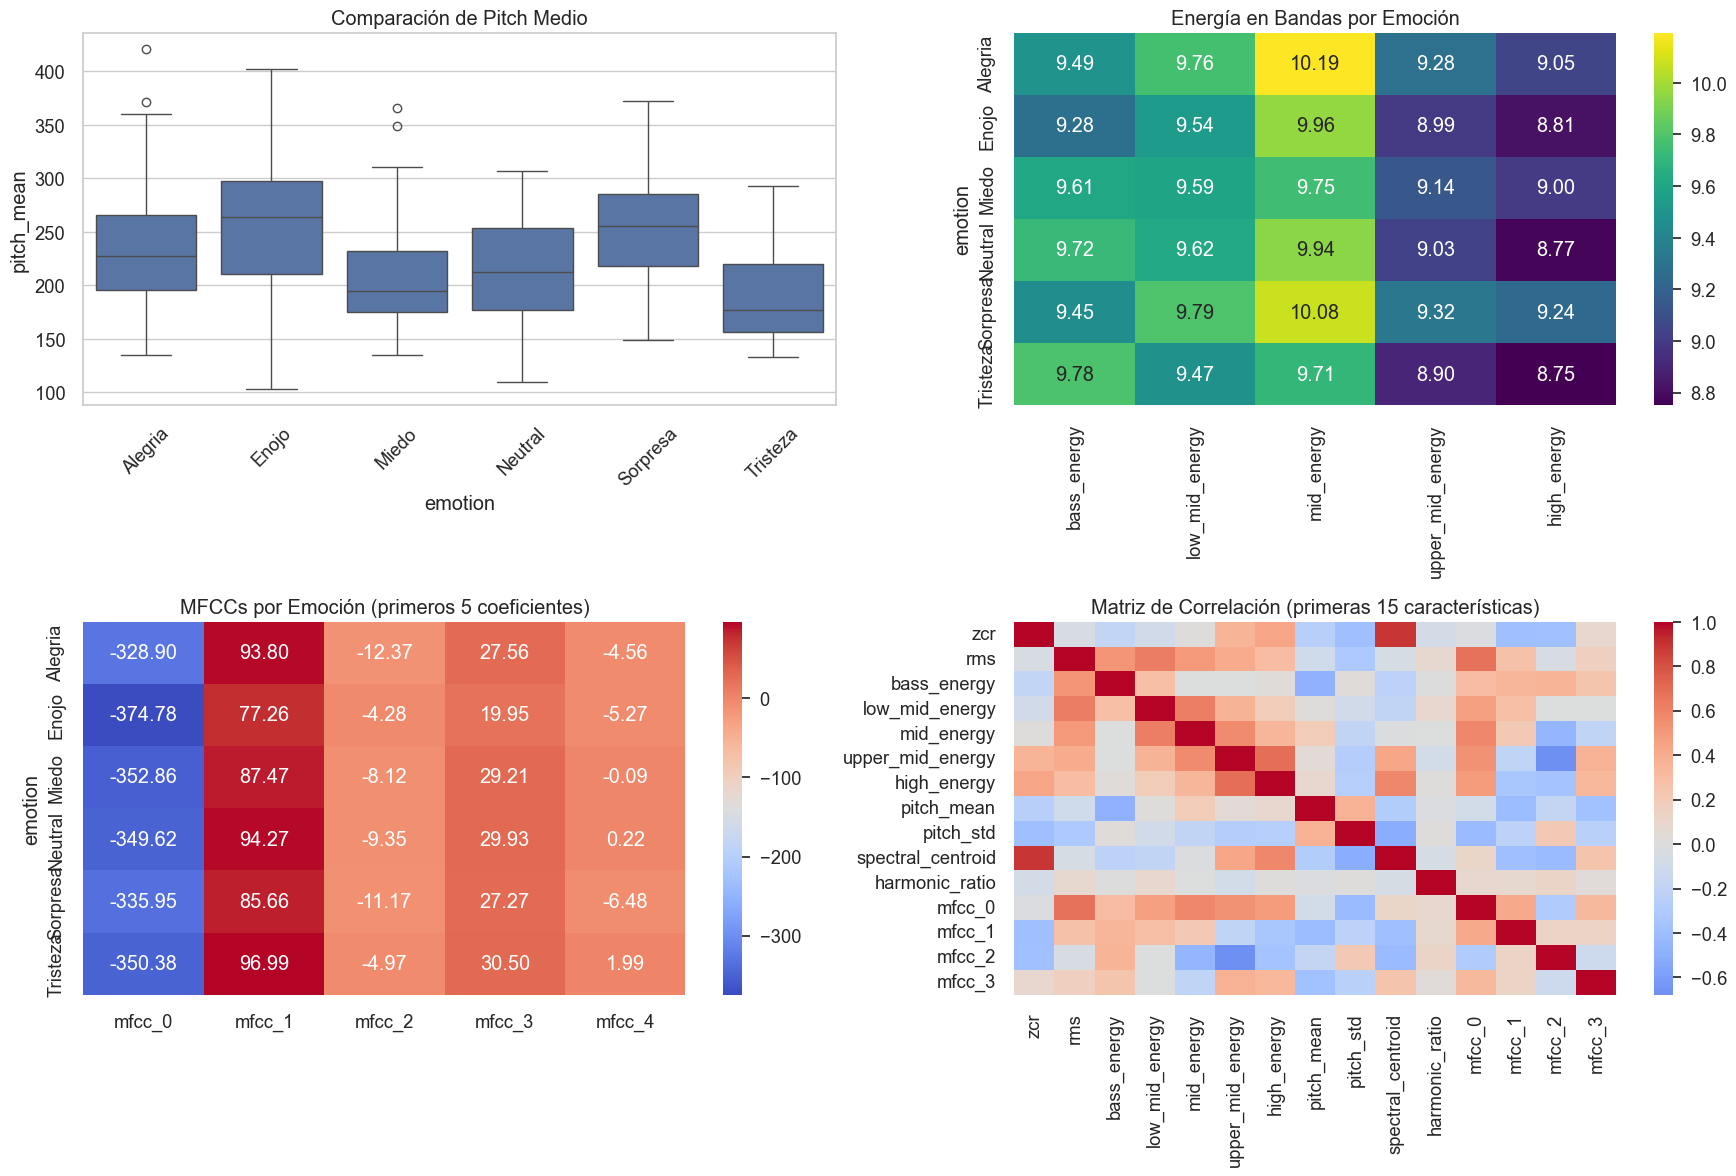

In [67]:
def plot_emotion_comparison():
    """Compara características clave entre todas las emociones"""
    plt.figure(figsize=(18, 12))
    
    # 1. Comparación de pitch
    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x='emotion', y='pitch_mean', order=EMOTIONS)
    plt.title('Comparación de Pitch Medio')
    plt.xticks(rotation=45)
    
    # 2. Comparación de energía en bandas
    plt.subplot(2, 2, 2)
    band_cols = [col for col in df.columns if '_energy' in col]
    band_means = df.groupby('emotion')[band_cols].mean()
    sns.heatmap(band_means, annot=True, cmap='viridis', fmt='.2f')
    plt.title('Energía en Bandas por Emoción')
    
    # 3. Comparación de MFCCs
    plt.subplot(2, 2, 3)
    mfcc_cols = [f'mfcc_{i}' for i in range(5)]
    mfcc_means = df.groupby('emotion')[mfcc_cols].mean()
    sns.heatmap(mfcc_means, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('MFCCs por Emoción (primeros 5 coeficientes)')
    
    # 4. Correlación entre características
    plt.subplot(2, 2, 4)
    corr_matrix = df.select_dtypes(include=np.number).corr()
    sns.heatmap(corr_matrix.iloc[:15, :15], cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación (primeras 15 características)')
    
    plt.tight_layout()
    plt.show()

# %%
plot_emotion_comparison()

In [16]:
#!pip install librosa matplotlib numpy tk

## Visualizar un espectograma de 1 audio de Enojo

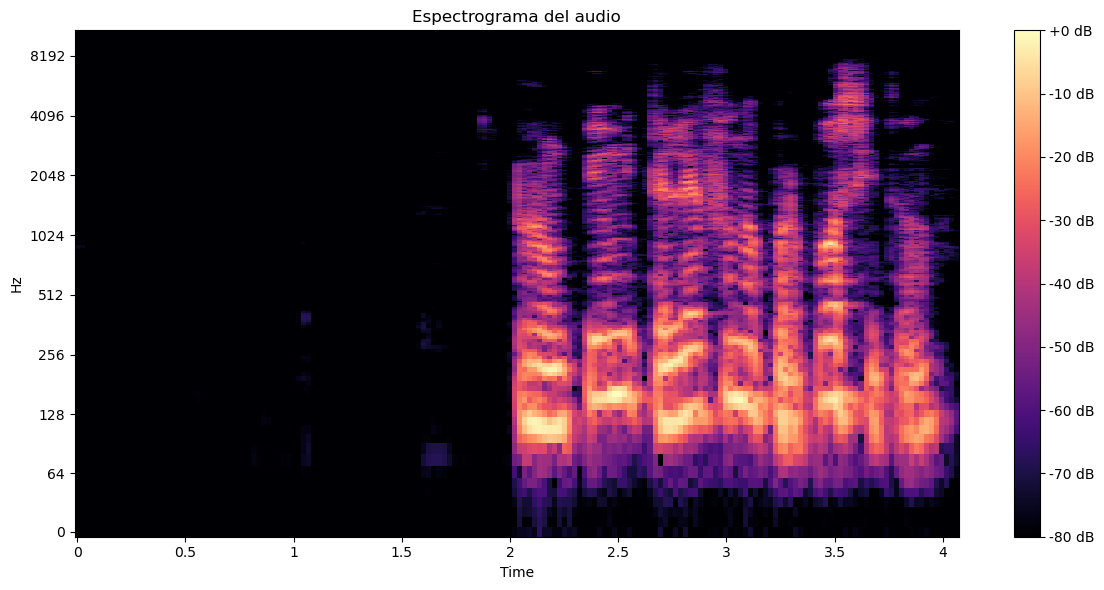

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def mostrar_espectrograma(ruta_audio):
    y, sr = librosa.load(ruta_audio)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma del audio')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
mostrar_espectrograma("Dataset/Enojo/Enojo_001.wav")

## Visualizar un espectograma de Alegría

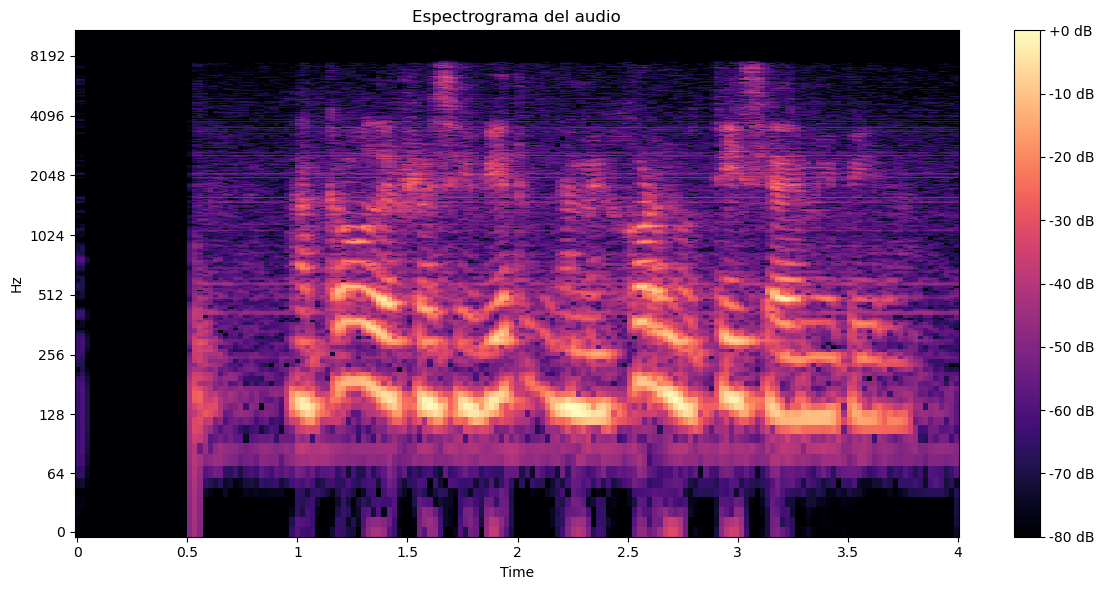

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def mostrar_espectrograma(ruta_audio):
    y, sr = librosa.load(ruta_audio)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma del audio')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
mostrar_espectrograma("Dataset_comprimido/Alegria/alegria (1) - Miguel Azaña Flores.wav")

In [ ]:
## Tristeza

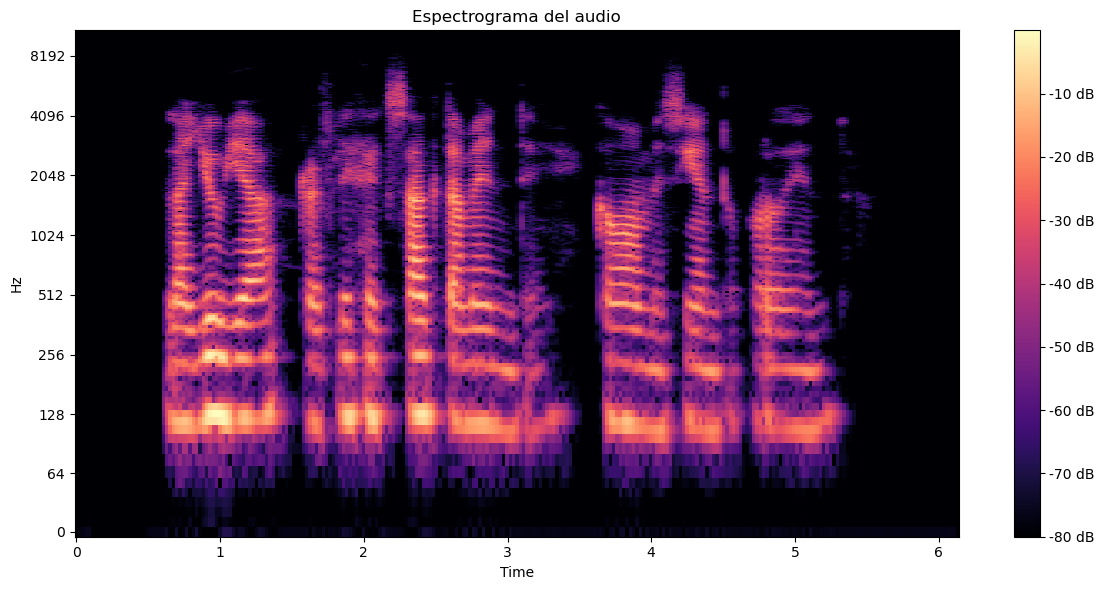

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def mostrar_espectrograma(ruta_audio):
    y, sr = librosa.load(ruta_audio)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma del audio')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
mostrar_espectrograma("Dataset/Tristeza/tristeza_029.wav")

## Para visualizar la compresión de un solo audio


🔊 Reproduciendo audio ORIGINAL:



🔇 Reproduciendo audio COMPRIMIDO:



📊 Comparación visual:


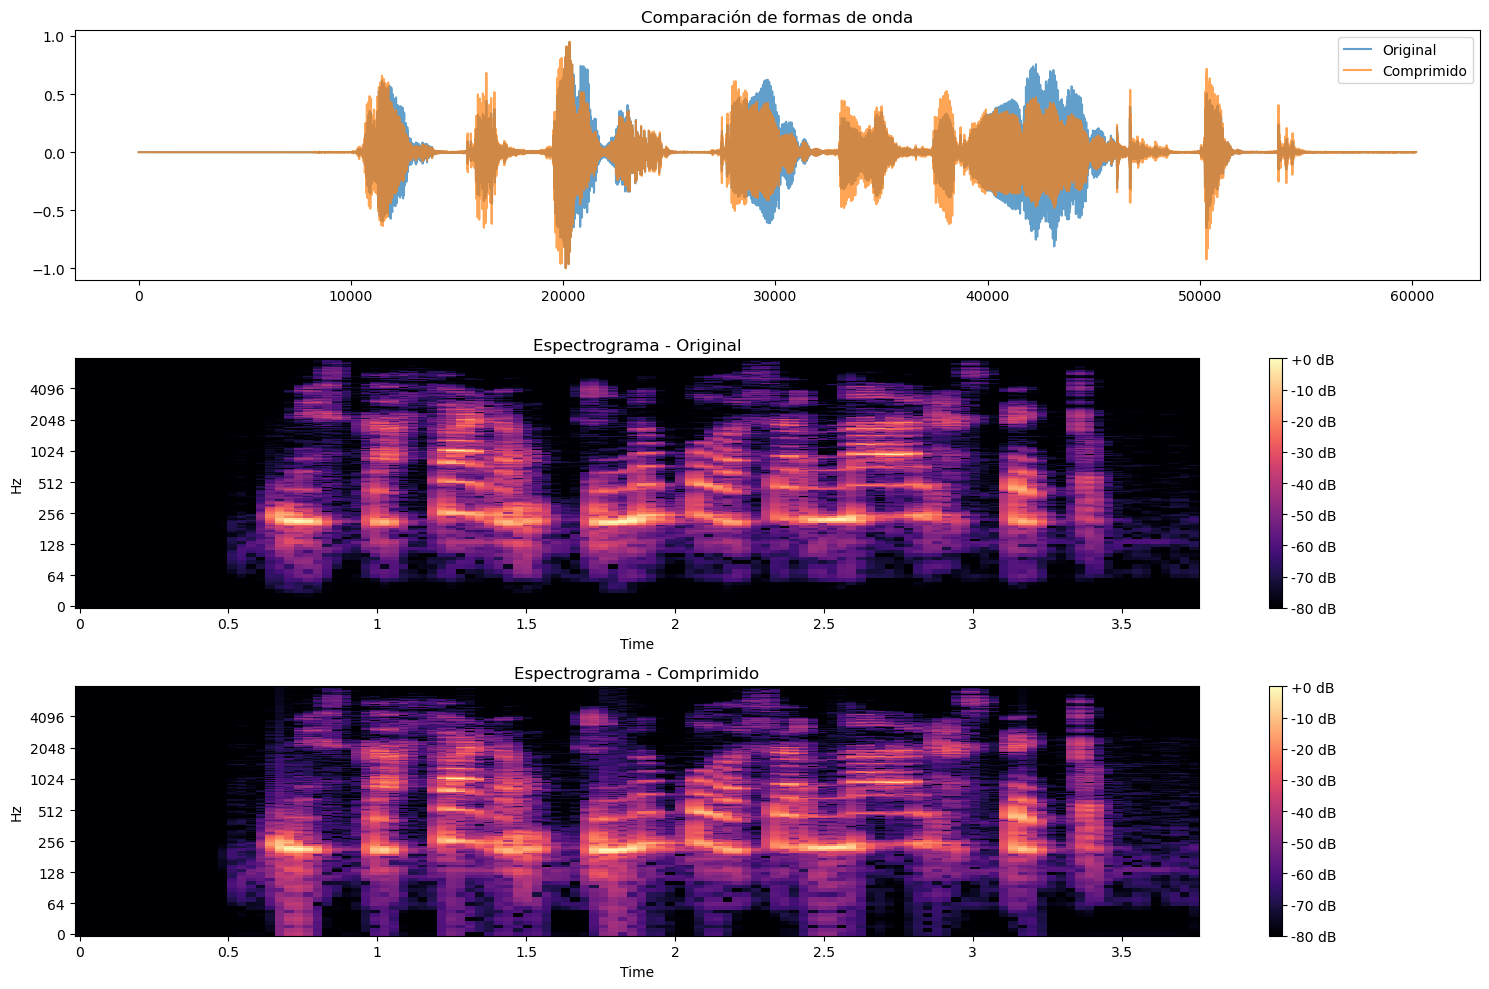


💾 Audio comprimido guardado en: Dataset/Enojo/Enojo_201_compressed.wav


In [5]:
import os
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog, Tk
from IPython.display import Audio, display

# ========== CONFIGURACIÓN ==========
SAMPLE_RATE = 16000
THRESHOLD_DB = -25    # Nivel donde empieza a comprimirse
RATIO = 3.0           # Ratio de compresión
MAKEUP_GAIN = 5.0     # Ganancia final para compensar

# ========== FUNCIONES ==========
def db_to_amp(db):
    return 10 ** (db / 20.0)

def compress_dynamic(y, sr, threshold_db, ratio, makeup_gain_db):
    frame_length = 2048
    hop_length = 512
    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    rms_db = librosa.amplitude_to_db(rms, ref=1.0)

    gain_db = np.zeros_like(rms_db)
    for i, db_val in enumerate(rms_db):
        if db_val > threshold_db:
            gain_db[i] = (threshold_db + (db_val - threshold_db) / ratio) - db_val
        else:
            gain_db[i] = 0.0

    gain_db += makeup_gain_db
    gain = db_to_amp(gain_db)

    y_compressed = np.zeros_like(y)
    for i, g in enumerate(gain):
        start = i * hop_length
        end = min(start + frame_length, len(y))
        y_compressed[start:end] += y[start:end] * g

    # Evitar clipping
    max_amp = np.max(np.abs(y_compressed))
    if max_amp > 1.0:
        y_compressed = y_compressed / max_amp

    return y_compressed

def plot_comparison(y_orig, y_comp, sr):
    plt.figure(figsize=(15, 10))
    
    # Onda de audio
    plt.subplot(3, 1, 1)
    plt.plot(y_orig, alpha=0.7, label='Original')
    plt.plot(y_comp, alpha=0.7, label='Comprimido')
    plt.title('Comparación de formas de onda')
    plt.legend()
    
    # Espectrograma original
    plt.subplot(3, 1, 2)
    D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_orig)), ref=np.max)
    librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma - Original')
    
    # Espectrograma comprimido
    plt.subplot(3, 1, 3)
    D_comp = librosa.amplitude_to_db(np.abs(librosa.stft(y_comp)), ref=np.max)
    librosa.display.specshow(D_comp, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma - Comprimido')
    
    plt.tight_layout()
    plt.show()

def process_single_file():
    # Configurar interfaz para seleccionar archivo
    root = Tk()
    root.withdraw()
    file_path = "Dataset/Enojo/Enojo_201.wav"
    
    if not file_path:
        print("No se seleccionó ningún archivo.")
        return
    
    # Cargar audio original
    y_orig, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    
    # Mostrar audio original
    print("\n🔊 Reproduciendo audio ORIGINAL:")
    display(Audio(data=y_orig, rate=sr))
    
    # Aplicar compresión
    y_comp = compress_dynamic(y_orig, sr, THRESHOLD_DB, RATIO, MAKEUP_GAIN)
    
    # Mostrar audio comprimido
    print("\n🔇 Reproduciendo audio COMPRIMIDO:")
    display(Audio(data=y_comp, rate=sr))
    
    # Mostrar comparación visual
    print("\n📊 Comparación visual:")
    plot_comparison(y_orig, y_comp, sr)
    
    # Guardar archivo comprimido (opcional)
    output_path = os.path.splitext(file_path)[0] + "_compressed.wav"
    sf.write(output_path, y_comp, sr)
    print(f"\n💾 Audio comprimido guardado en: {output_path}")

# ========== EJECUCIÓN ==========
if __name__ == "__main__":
    process_single_file()